#### Ex 2.1
If $\epsilon = 0.5$, and there are only two actions, the probability of greedy action selected is 0.5.

Ex 2.2


|t = | 0 | 1 | 2 | 3   | 4   | 5   |
|----|---|---|---|-----|-----|-----|
|Q(1)| 0 | 1 | 1 | 1   | 1   | 1   |
|Q(2)| 0 | 0 | 1 | 1.5 | 2.5 | 2.5 |
|Q(3)| 0 | 0 | 0 | 0   | 0   | 0   |
|Q(4)| 0 | 0 | 0 | 0   | 0   | 0   |
|Q(5)| 0 | 0 | 0 | 0   | 0   | 0   |


Here is a table of Value for each action vs time step. At the 5th time step exploration occured. Since it does not pick the highest valued action instead it picks A = 3 with 0 value.



Ex 2.3

Ex 2.4

Expanding $Q_{n+1} = Q_{n} + a_n (R_n - Q_n)$,  we get
$$ Q_{n+1} = a_n R_n + \sum^{n-1}_{i-1} a_i (a_{i+1} - 1) \cdots (a_n - 1) R_i + Q_n \prod^{n}_{i=1} (a_i - 1)$$

In [5]:
import numpy as np
from numpy import random
import matplotlib.pyplot as pyplot

In [79]:
# one bandit run
def singlerun(epsilon, step_size, time_steps, arms_count, stationary=True):
    arms_mean = np.array([q_star for q_star in random.normal(size=arms_count)])
    arms_var = 1
    q = np.zeros(arms_count)
    action_select_count = np.zeros(arms_count)
    r = np.zeros(time_steps)
    opt = np.zeros(time_steps)
    for step in range(time_steps):
        if random.uniform() < epsilon:
            # exploration
            action = random.randint(0, arms_count)
        else:
            # exploitation
            action = np.argmax(q)
            
        # update selected count for this action
        action_select_count[action] += 1
            
        # record if this action is indeed optimal
        if action == np.argmax(arms_mean):
            opt[step] = 1
        else:
            opt[step] = 0
        
        # get reward by performing this action
        reward = random.normal(loc=arms_mean[action], scale=arms_var)
        
        # update value function with sampel avg
        q[action] = q[action] + (reward  - q[action]) / action_select_count[action]
        
        # record reward
        r[step] = reward
        
        # update arms if arms distributions are not stationary
        if not stationary:
            for i in range(len(arms_mean)):
                arms_mean[i] += random.normal(loc=0, scale=1)
            arms_var += 0.001
    
    return (r, opt)    

In [80]:
# multi bandit runs avg
def multirun(runs, epsilon, step_size, time_steps, arms_count, stationary=True):
    r, opt = singlerun(epsilon, step_size, time_steps, arms_count, stationary)
    for i in range(1, runs):
        r_1, opt_1 = singlerun(epsilon, step_size, time_steps, arms_count, stationary)
        r += r_1
        opt += opt_1
    
    return (r / runs, opt / runs)


In [81]:
r_avg_1 , opt_avg_1 = multirun(2000, 0.1, 0.1, 1000, 10)
r_avg_2 , opt_avg_2 = multirun(2000, 0.01, 0.1, 1000, 10)
r_avg_3 , opt_avg_3 = multirun(2000, 0, 0.1, 1000, 10)


<IPython.core.display.Javascript object>


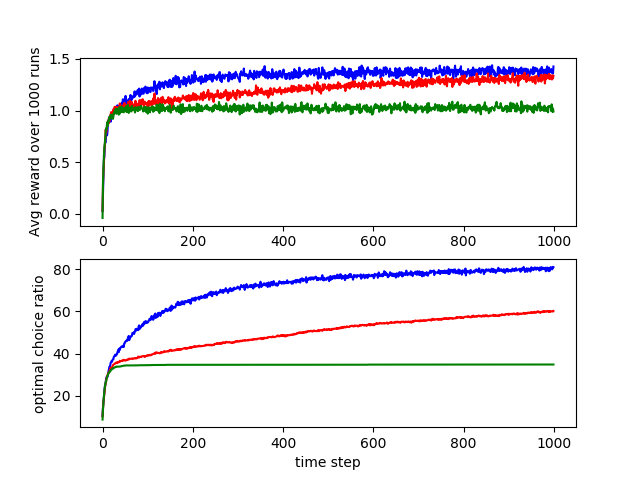

Text(0.5,0,'time step')

In [82]:
pyplot.subplot(2, 1, 1)
pyplot.plot(r_avg_1,  color="b", label="0.1")
pyplot.plot(r_avg_2,  color="r", label="0.01")
pyplot.plot(r_avg_3,  color="g", label="0")
pyplot.ylabel('Avg reward over 1000 runs')

pyplot.subplot(2, 1, 2)
pyplot.plot(opt_avg_1 * 100,  color="b", label="0.1")
pyplot.plot(opt_avg_2 * 100,  color="r", label="0.01")
pyplot.plot(opt_avg_3 * 100,  color="g", label="0")
pyplot.ylabel('optimal choice ratio')
pyplot.xlabel('time step')

In [83]:
r_avg_1 , opt_avg_1 = multirun(1000, 0.1, 0.1, 2000, 10, False)
r_avg_2 , opt_avg_2 = multirun(1000, 0.01, 0.1, 2000, 10, False)
r_avg_3 , opt_avg_3 = multirun(1000, 0, 0.1, 2000, 10, False)

<IPython.core.display.Javascript object>


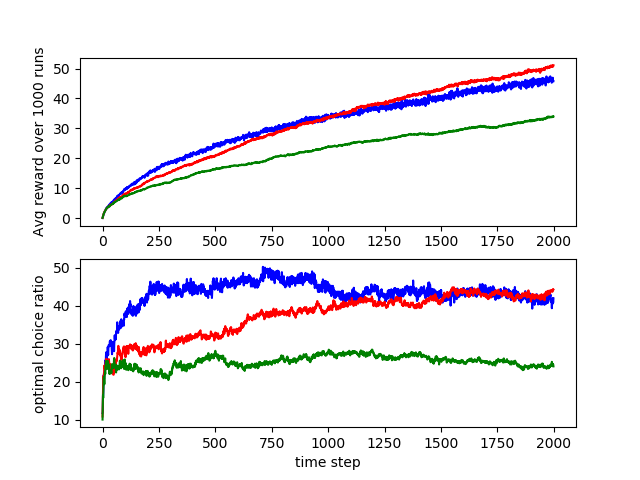

Text(0.5,0,'time step')

In [84]:
%matplotlib notebook
pyplot.subplot(2, 1, 1)
pyplot.plot(r_avg_1,  color="b", label="0.1")
pyplot.plot(r_avg_2,  color="r", label="0.01")
pyplot.plot(r_avg_3,  color="g", label="0")
pyplot.ylabel('Avg reward over 1000 runs')

pyplot.subplot(2, 1, 2)
pyplot.plot(opt_avg_1 * 100,  color="b", label="0.1")
pyplot.plot(opt_avg_2 * 100,  color="r", label="0.01")
pyplot.plot(opt_avg_3 * 100,  color="g", label="0")
pyplot.ylabel('optimal choice ratio')
pyplot.xlabel('time step')

Ex 2.6:
  The spike is caused by the initialization of optimistic method which makes it explore all the actions early on, for initial exploration of a new action, the action's reward has full weight before it gets average out later on which causes fluctuation at the beginning.

Ex 2.7:

From recurrence relation of $o_t$,  we have $ o_{n+1} - 1 = (1 - \alpha) (o_n - 1) = a (o_n - 1)$ where $a = 1 - \alpha$.

Then $o_t = 1 - a^t$. 

So $\beta_t = \frac{1- a}{1 - a^t}$,  let $b_t = 1 - \beta_t = a \frac{1 - a^{t-1}}{1 - a^{t}}$

We can compute $b_t b_{t -1} \cdots b_{t -i + 1} = a^i \frac{ 1- a^{t - i - 1}} {1 - a^{t-1}}$ by cancelation.

$$\begin{split}
  Q_{t+1} &= Q_t + \beta_t (R_t - Q_t) = \beta_t R_t + Q_t (1 - \beta_t) \\
  &= \beta_t R_t + \sum^{t-2}_{i=1} b_t\cdots b_{t -i + 1} \beta_{t-i} R_{t-i} + b_t \cdots b_1 Q_1 \\
  &= \beta_t R_t + \sum^{t-1}_{i=1} a^i \frac{ 1- a^{t - i}} {1 - a^{t}} \beta_{t-i} R_{t-i} + a^t \frac{1 - a^0}{1-a^t} Q_1\\
  &=  \frac{1- a}{1 - a^{t-1}}\sum^{t-1}_{i=0} a^{i - 1} R_{t-i} + 0
\end{split}$$

Therefore it is expoential recency weighted, and since $Q_1$ vanishes, it has no bias.


Ex 2.8:
  The action is chosen by $$A_t = argmax\left[ Q_t(a) + c \sqrt{\frac{lnt}{N_t(a)}} \right]$$
  
  At the begining 10 actions, all 10 actions are explored since $N_t = 0$ for all actions. At the 11th time step, $N_t = 1$ for all actions, so we pick the action with highest $Q_t(a)$ which gives the peak. After the 11th time steps, the confidence of action with highest $Q$ is reduced since $N_t = 2$ for that action. It will go on and select the 2nd , 3rd, 4th action with highest $Q$,  

Ex 2.9:
For two actions A and B, $$ \pi_t(A) = \frac{exp(H_t(A))}{exp(H_t(A)) + exp(H_t(B))} = \frac{1}{1 + exp(- [H_t(B) + H_t(A)])} $$. Let $a_t = H_t(B) + H_t(A)$,  we have a sigmoid distribution.